# Problem 1

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.stats as stats
import sympy as sy
import scipy.integrate as integrate
import scipy.special as spec

clms=np.loadtxt('clms.txt')
datamean=np.mean(clms)
datamedian=np.median(clms)
datamax=np.max(clms)
datamin=np.min(clms)
weights=np.ones(len(clms))/len(clms)
datastd=np.std(clms)
print('mean=',datamean,'median=',datamedian,'standard deviation=',datastd,
        'max=',datamax,'min=',datamin)

mean= 720.277975327 median= 172.21 standard deviation= 3972.66375639 max= 227967.25 min= 0.01


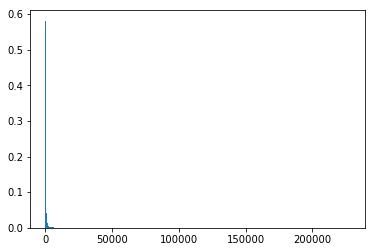

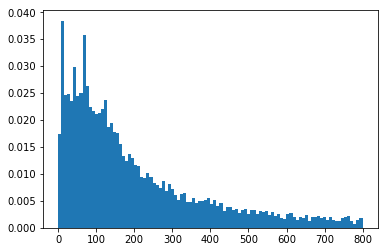

In [3]:
weights=np.ones(len(clms))/len(clms)
plt.hist(clms, bins=1000, weights=weights)
plt.show()

plt.hist(clms[clms<=800], bins=100, weights=weights[:len(clms[clms<=800])])
plt.show()

## GA distribution

In [4]:
def critGA(params, *args):
    alpha,beta=params
    xvals=args
    pdf_vals=stats.gamma.pdf(xvals,alpha,scale=beta)
    log_vals=np.log(pdf_vals)
    return -log_vals.sum()


In [5]:
betaGA_init=(((datastd)**2)/datamean)
alphaGA_init=datamean/betaGA_init
params_initGA=np.array([alphaGA_init,betaGA_init])
resultsGA=opt.minimize(critGA,params_initGA, args=(clms), method='SLSQP', bounds=((1e-6,None),(1e-6,None)), tol=1e-14)
alphaGA,betaGA=resultsGA.x
print('Estimated value of alpha=',alphaGA,'\nEstimated value of beta=',betaGA,
         '\nMaximized LLF=',-resultsGA.fun)
resultsGA

/Users/hqdhftw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Estimated value of alpha= 0.472507980137 
Estimated value of beta= 1524.39759189 
Maximized LLF= -77723.47342611522


     fun: 77723.47342611522
     jac: array([ 0.00097656,  0.00097656])
 message: 'Optimization terminated successfully.'
    nfev: 208
     nit: 42
    njev: 41
  status: 0
 success: True
       x: array([  4.72507980e-01,   1.52439759e+03])

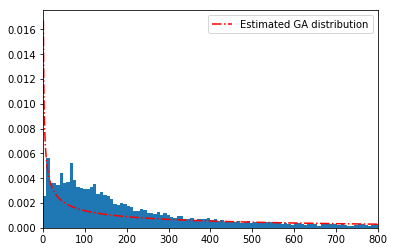

In [6]:
#Plot the second histogram vs GA:
x=np.linspace(0,200000,200000)
plt.hist(clms[clms<=800], bins=100, weights=weights[:len(clms[clms<=800])], normed=True)
plt.plot(x,stats.gamma.pdf(x,alphaGA,scale=betaGA),'r-.',label='Estimated GA distribution')
plt.xlim(0,800)
plt.legend()
plt.show()

## GG distribution

In [7]:
def critGG(params,*args):
    alpha,beta,m=params
    xvals=args
    pdf_vals=stats.gengamma.pdf(xvals,alpha,m, scale=beta)
    log_vals=np.log(pdf_vals)
    return -log_vals.sum()

In [8]:
params_initGG=np.array([alphaGA, betaGA, 1])
resultsGG=opt.minimize(critGG, params_initGG, args=(clms), method='L-BFGS-B', bounds=((1e-6,None),(1e-6,None),
                                                                                       (1e-6,None)))
                                                                                          
alphaGG, betaGG, m=resultsGG.x
print('Estimated value of alpha=',alphaGG,'\nEstimated value of beta=',betaGG,'\n Estimated value of m=',m,
         '\nMaximized LLF=',-resultsGG.fun)
resultsGG

Estimated value of alpha= 0.562937371015 
Estimated value of beta= 1524.3973761 
 Estimated value of m= 0.799054918742 
Maximized LLF= -77283.3357982


      fun: 77283.335798197571
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.71595423,  0.76834112,  0.04511094])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 6
   status: 0
  success: True
        x: array([  5.62937371e-01,   1.52439738e+03,   7.99054919e-01])

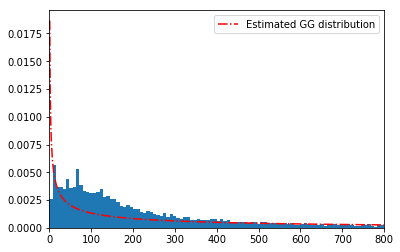

In [9]:
#Plot the second histogram vs GG:
plt.hist(clms[clms<=800], bins=100, weights=weights[:len(clms[clms<=800])], normed=True)
plt.plot(x, stats.gengamma.pdf(x, alphaGG, m, scale=betaGG),'r-.', label='Estimated GG distribution')
plt.legend()
plt.xlim(0,800)
plt.show()

## GB2 distribution

In [10]:
def GB2pdf(x,a,b,p,q):
    A=abs(a)*x**(a*p-1)
    B=(b**(a*p))*(spec.beta(p,q))
    C=(1+(x/b)**a)**(p+q)
    return A/(B*C)

In [11]:
def critGB2(params,*args):
    a,b,p,q=params
    xvals=args
    pdf_vals=GB2pdf(xvals,a,b,p,q)
    log_vals=np.log(pdf_vals)
    return -log_vals.sum()

In [12]:
q=10
params_initGB2=np.array([m, betaGG*(q**(1/m)), alphaGG, q])
resultsGB2=opt.minimize(critGB2, params_initGB2, args=(clms), method='L-BFGS-B', bounds=((1e-10,None),(1e-10,None),
                                                                                       (1e-10,None), (1e-10,None)))                                                                                      
aGB2, bGB2, pGB2, qGB2=resultsGB2.x
print('Estimated value of a=',aGB2,'\nEstimated value of b=',bGB2,'\nEstimated value of p=',pGB2,
         '\nEstimated value of q=',qGB2,'\nMaximized LLF=',-resultsGB2.fun)
resultsGB2

Estimated value of a= 0.104717381415 
Estimated value of b= 27200.4542084 
Estimated value of p= 64.516655514 
Estimated value of q= 108.40901168 
Maximized LLF= -74861.5538263


      fun: 74861.553826339528
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.90062565e+01,  -1.45519152e-03,   1.02591002e+00,
        -4.55474947e-01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 760
      nit: 97
   status: 0
  success: True
        x: array([  1.04717381e-01,   2.72004542e+04,   6.45166555e+01,
         1.08409012e+02])

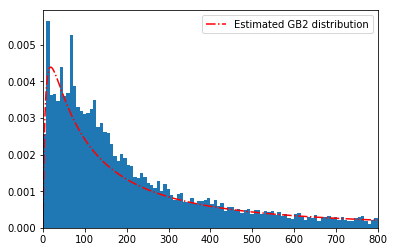

In [13]:
#plot the second histogram vs GB2:
plt.hist(clms[clms<=800], bins=100, weights=weights[:len(clms[clms<=800])], normed=True)
plt.plot(x, GB2pdf(x,aGB2,bGB2,pGB2,qGB2), 'r-.', label='Estimated GB2 distribution')
plt.legend()
plt.xlim(0,800)
plt.show()

## Likelihood test

In [14]:
q=10000
log_lik_GA = np.log(GB2pdf(clms, 1, q*betaGA, alphaGA, q)).sum()
log_lik_GG = np.log(GB2pdf(clms, m, q**(1/m)*betaGG, alphaGG, q)).sum()
log_lik_GB2= np.log(GB2pdf(clms, aGB2,bGB2,pGB2,qGB2)).sum()
LR_GA=2*(log_lik_GB2-log_lik_GA)
LR_GG=2*(log_lik_GB2-log_lik_GG)
pval_GA = 1.0 - stats.chi2.cdf(LR_GA, 4)
pval_GG = 1.0 - stats.chi2.cdf(LR_GG, 4)
pval_GA, pval_GG

(0.0, 0.0)

In [15]:
probGB2=integrate.quad(lambda x: GB2pdf(x,aGB2,bGB2,pGB2,qGB2), 0, 1000)[0]
probGA=stats.gamma.cdf(1000,alphaGA,scale=betaGA)
print('Probability of monthly healthcare >$1,000 using GB2=',1-probGB2,
     '\nProbability of monthly healthcare >$1,000 using GA =',1-probGA)

Probability of monthly healthcare >$1,000 using GB2= 0.1313834231482699 
Probability of monthly healthcare >$1,000 using GA = 0.236780829325


# Problem 2

In [16]:
import pandas as pd

In [17]:
macro = pd.read_csv('MacroSeries.txt', sep=',', header = None)
macro.columns=['c_t','k_t','w_t','r_t']
beta=0.99
c=np.array(macro['c_t'])
k=np.array(macro['k_t'])
w=np.array(macro['w_t'])
r=np.array(macro['r_t'])

## MLE estimation using w and k

In [18]:
def MLEfunc_wk(alpha, rho, mu, sigma):
    z=np.zeros(100)
    z[0]=mu
    probz=np.empty_like(z)
    probz[0]=1
    for t in range(1,100,1):
        z[t]=np.log(w[t])-alpha*np.log(k[t])-np.log(1-alpha)
        probz[t]=stats.norm.pdf(z[t], loc=rho*z[t-1]+(1-rho)*mu, scale=sigma)
    return z, probz

In [19]:
def crit1(params):
    alpha, rho, mu, sigma=params
    probz=MLEfunc_wk(alpha, rho, mu, sigma)[1]
    log_vals=np.log(probz)
    return -log_vals.sum()

In [25]:
params_init=np.array([0.5,0.4,9,0.1])
results1=opt.minimize(crit1, params_init, method='L-BFGS-B', bounds=((1e-6,0.999),(-1,0.999), 
                                                                               (1e-6,None), (1e-6,None)), tol=1e-16)
alpha1, rho1, mu1, sigma1=results1.x
vcv1=results1.hess_inv
print('Estimated values: \nalpha=',alpha1,'\nrho=',rho1,'\nmu=',mu1,'\nsigma=',sigma1
         ,'\nVCV matrix=',vcv1)
results1

Estimated values: 
alpha= 0.48631399148 
rho= 0.701902428778 
mu= 9.1303320528 
sigma= 0.0923158509393 
VCV matrix= <4x4 LbfgsInvHessProduct with dtype=float64>


      fun: -95.396482276710287
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.42108547e-05,   8.52651283e-06,   0.00000000e+00,
        -1.42108547e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 305
      nit: 41
   status: 0
  success: True
        x: array([ 0.48631399,  0.70190243,  9.13033205,  0.09231585])

## MLE estimation using r and k

In [21]:
def MLEfunc_rk(alpha, rho, mu, sigma):
    z=np.zeros(100)
    z[0]=mu
    probz=np.empty_like(z)
    probz[0]=1
    for t in range(1,100,1):
        z[t]=np.log(r[t])+(1-alpha)*np.log(k[t])-np.log(alpha)
        probz[t]=stats.norm.pdf(z[t], loc=rho*z[t-1]+(1-rho)*mu, scale=sigma)
    return z, probz

In [22]:
def crit2(params):
    alpha, rho, mu, sigma=params
    probz=MLEfunc_rk(alpha, rho, mu, sigma)[1]
    log_vals=np.log(probz)
    return -log_vals.sum()

In [30]:
params_init=np.array([0.4,0.4,9,0.2])
results2=opt.minimize(crit2, params_init, method='L-BFGS-B', bounds=((1e-6,0.999),(-1,0.999), 
                                                                               (1e-6,None), (3e-1,None)))
alpha2,rho2,mu2,sigma2=results2.x
vcv2=results2.hess_inv
print('Estimated values: \nalpha=',alpha2,'\nrho=',rho2,'\nmu=',mu2,'\nsigma=',sigma2
         ,'\nVCV matrix=',vcv2)
results2

Estimated values: 
alpha= 0.48624225239 
rho= 0.701957174516 
mu= 8.86360209194 
sigma= 0.3 
VCV matrix= <4x4 LbfgsInvHessProduct with dtype=float64>


      fun: -23.531173331098888
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.62359015e-04,  -4.12114787e-05,  -7.10542736e-06,
         2.98751866e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 210
      nit: 27
   status: 0
  success: True
        x: array([ 0.48624225,  0.70195717,  8.86360209,  0.3       ])

## Estimate probability of r>1

In [32]:
kt=7500000
oldz=10
#value of zstar such that r=1:
zstar=(1-alpha2)*np.log(kt)-np.log(alpha2)
#P(r>1|params)=P(z>zstar):
prob_r=1-stats.norm.cdf(zstar, loc=rho2*oldz+(1-rho2)*mu2, scale=sigma2)
prob_r

0.99643662424259694